In [1]:
%%capture
cd ..

In [2]:
import os
from PIL import Image
os.chdir('/Users/tiananoll-walker/Documents/bmsis/alphabets_code/alphabet_complexity-main/')


In [3]:
import numpy as np
from matplotlib import pyplot as plt
from utils.unicode_utils import create_df_unicode, code_type, get_language, preprocess_code,make_picture
from utils.complexity_metrics import pixel_count_complexity


In [4]:
df_unicode = create_df_unicode()

df_unicode

Resolved file path: /Users/tiananoll-walker/Documents/bmsis/alphabets_code/alphabet_complexity-main/data/unicode_names_list.txt


,code,note,rep
0,0020,SPACE,
1,0021,EXCLAMATION MARK,!
2,0022,QUOTATION MARK,""""
3,0023,NUMBER SIGN,#
4,0024,DOLLAR SIGN,$
...,...,...,...
34818,E01EB,VARIATION SELECTOR-252,󠇫
34819,E01EC,VARIATION SELECTOR-253,󠇬
34820,E01ED,VARIATION SELECTOR-254,󠇭
34821,E01EE,VARIATION SELECTOR-255,󠇮


In [5]:
dfu=df_unicode[df_unicode.code.apply(code_type)=='Writing Symbol'].reset_index(drop=True)
dfu['language'] = dfu.note.apply(get_language)
dfu.language.value_counts()            

ARABIC         1330
CUNEIFORM      1234
YI             1220
LATIN          1213
CJK            1165
               ... 
GROUP             1
UNCERTAINTY       1
NEPTUNE           1
BALLOT            1
SPACE             1
Name: language, Length: 819, dtype: int64

In [6]:
#for i in dfu.language.value_counts().index:
    #print(i)
    #print(' '.join([u(k) for k in dfu[dfu.language==i].code]))

In [7]:
' '.join(dfu[dfu.language=='MYANMAR'].rep)


'က ခ ဂ ဃ င စ ဆ ဇ ဈ ဉ ည ဋ ဌ ဍ ဎ ဏ တ ထ ဒ ဓ န ပ ဖ ဗ ဘ မ ယ ရ လ ဝ သ ဟ ဠ အ ဢ ဣ ဤ ဥ ဦ ဧ ဨ ဩ ဪ ါ ာ ိ ီ ု ူ ေ ဲ ဳ ဴ ဵ ံ ့ း ္ ် ျ ြ ွ ှ ဿ ၀ ၁ ၂ ၃ ၄ ၅ ၆ ၇ ၈ ၉ ၊ ။ ၌ ၍ ၎ ၏ ၐ ၑ ၒ ၓ ၔ ၕ ၖ ၗ ၘ ၙ ၚ ၛ ၜ ၝ ၞ ၟ ၠ ၡ ၢ ၣ ၤ ၥ ၦ ၧ ၨ ၩ ၪ ၫ ၬ ၭ ၮ ၯ ၰ ၱ ၲ ၳ ၴ ၵ ၶ ၷ ၸ ၹ ၺ ၻ ၼ ၽ ၾ ၿ ႀ ႁ ႂ ႃ ႄ ႅ ႆ ႇ ႈ ႉ ႊ ႋ ႌ ႍ ႎ ႏ ႐ ႑ ႒ ႓ ႔ ႕ ႖ ႗ ႘ ႙ ႚ ႛ ႜ ႝ ႞ ႟ ꧠ ꧡ ꧢ ꧣ ꧤ ꧥ ꧦ ꧧ ꧨ ꧩ ꧪ ꧫ ꧬ ꧭ ꧮ ꧯ ꧰ ꧱ ꧲ ꧳ ꧴ ꧵ ꧶ ꧷ ꧸ ꧹ ꧺ ꧻ ꧼ ꧽ ꧾ ꩠ ꩡ ꩢ ꩣ ꩤ ꩥ ꩦ ꩧ ꩨ ꩩ ꩪ ꩫ ꩬ ꩭ ꩮ ꩯ ꩰ ꩱ ꩲ ꩳ ꩴ ꩵ ꩶ ꩷ ꩸ ꩹ ꩺ ꩻ ꩼ ꩽ ꩾ ꩿ'

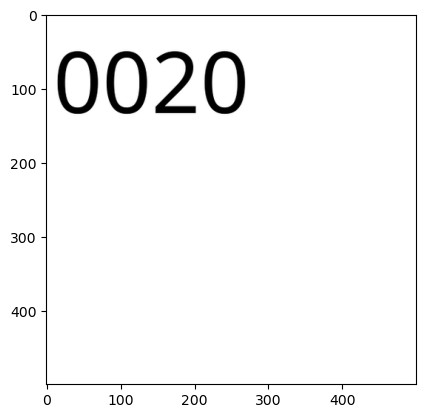

CPU times: user 104 ms, sys: 7.97 ms, total: 112 ms
Wall time: 114 ms


In [8]:
%%time
from PIL import Image

# Preprocess the code column to remove spaces and extra characters
dfu['code'] = dfu['code'].apply(preprocess_code)

# Define the font size
font_size = 120  # Replace with your desired font size

# Apply the make_picture function to the first row only
picture = make_picture(dfu.iloc[0]['code'], 'data/ttfs/NotoSans-Regular.ttf', font_size)

# Convert the grayscale image to RGB
picture_rgb = Image.fromarray((picture * 255).astype(np.uint8)).convert('RGB')

# Plot the image
plt.imshow(picture_rgb)
plt.show()
    



Pixel Count Complexity: 256
Unicode Representation:  
Unicode Code Point: 0020


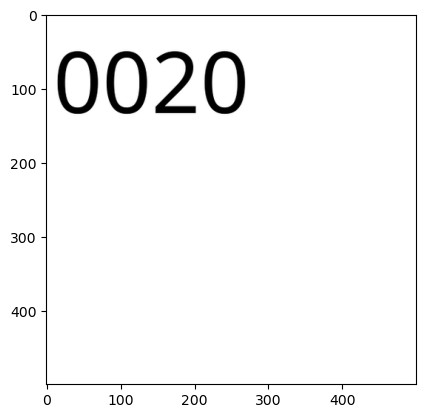

In [9]:
# Calculate the pixel count complexity for the image
pixel_count_complexity = pixel_count_complexity(picture)

# Retrieve the Unicode representation
unicode_representation = dfu.iloc[0]['rep']

# Print the values
print("Pixel Count Complexity:", pixel_count_complexity)
print("Unicode Representation:", unicode_representation)
print("Unicode Code Point:", dfu.iloc[0]['code'])  # Add this line to check the Unicode code point

# Display the image
plt.imshow(picture_rgb)
plt.show()



In [10]:
plt.hist(dfu.pixel_count_complexity,
        bins=np.arange(.994,1.0002,.0001))
plt.yscale('log')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'pixel_count_complexity'